# Project 3: Collaborative Filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# NOTE: Install pandas first, for loading csv data
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 3 MovieLens Dataset

### Question 1: Compute the sparsity of the movie rating dataset

In [2]:
# Change to your Local file direction
ratings = pd.read_csv("ratings.csv")

# NOTE: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
rating_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').values
# print(rating_matrix)
# print(rating_matrix.shape)

In [3]:
# users=610, movies=9724, total rates=5931640, Valid rates=100836
num_users = rating_matrix.shape[0]
num_movies = rating_matrix.shape[1]

totalnum_rates = num_users*num_movies
totalnum_rates_received = np.count_nonzero(~np.isnan(rating_matrix))
sparsity= 1.0*totalnum_rates_received/totalnum_rates
print('\nSparsity = %.8f' % sparsity)


Sparsity = 0.01699968


### Question 2: Plot the frequency of the rating values

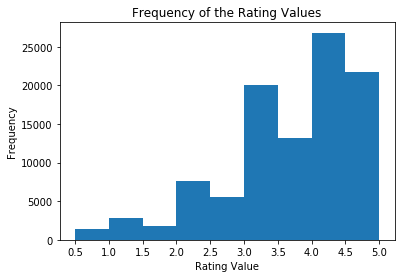

In [4]:
plt.hist(ratings['rating'].values, bins = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.title('Frequency of the Rating Values')
plt.xlabel('Rating Value')
plt.xticks(np.arange(min(ratings['rating'].values), max(ratings['rating'].values+0.5), 0.5))
plt.ylabel('Frequency')
plt.show()

### Question 3: Plot the distribution of number of ratings received among movies

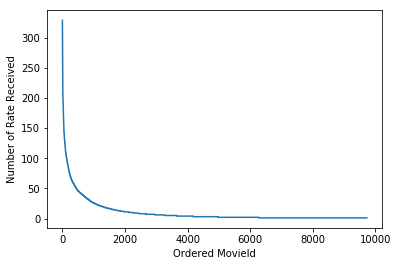

In [5]:
# find num of rate received for each movieId
movie_rate_received = np.count_nonzero(~np.isnan(rating_matrix), axis=0)

plt.plot(np.arange(1,num_movies+1), sorted(movie_rate_received,reverse=True))
plt.xlabel('Ordered MovieId')
plt.ylabel('Number of Rate Received')
plt.show()

### Question 4: Plot the distribution of rating among users

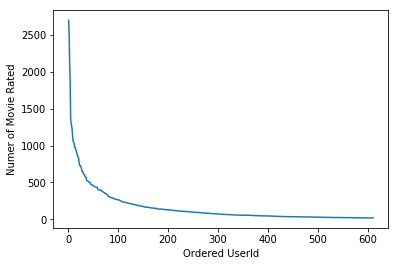

In [6]:
# find num of movie rated for each userId 
user_movie_rated = np.count_nonzero(~np.isnan(rating_matrix), axis=1)

plt.plot(np.arange(1,num_users+1), sorted(user_movie_rated,reverse=True))
plt.xlabel('Ordered UserId')
plt.ylabel('Numer of Movie Rated')
plt.show()

### Question 6: Compute variance of rates received for each movie 

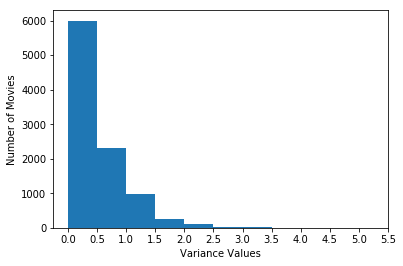

In [7]:
# find the variance for each movies ignoring NaN(return 0)
variance_movies = np.nanvar(rating_matrix, axis=0)

plt.hist(variance_movies, bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.xlabel("Variance Values")
plt.xticks(np.arange(min(variance_movies), max(variance_movies+0.5), 0.5))
plt.ylabel("Number of Movies")
plt.show()

## 4.2 Pearson-correlation coefficient

### Question 10: Design K-NN collaborative filter

In [8]:
# NOTE: https://surprise.readthedocs.io/en/stable/getting_started.html
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import KNNWithMeans
from surprise.model_selection.validation import cross_validate
# Load Data
reader = Reader(line_format='user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file( 
    "ratings.csv",reader=reader)

# Algorithm - long time
rmse = []
mae = []
for k in np.arange(2,101,2):
    print('now %d out of 100' %k)
    algo = KNNWithMeans(k=k, sim_options={'name': 'pearson'},verbose=False)
    CV = cross_validate(algo,data,measures=['rmse','mae'],cv=10,verbose=False)
    rmse.append(np.mean(CV['test_rmse']))
    mae.append(np.mean(CV['test_mae']))

now 2 out of 100
now 4 out of 100
now 6 out of 100
now 8 out of 100
now 10 out of 100
now 12 out of 100
now 14 out of 100
now 16 out of 100
now 18 out of 100
now 20 out of 100
now 22 out of 100
now 24 out of 100
now 26 out of 100
now 28 out of 100
now 30 out of 100
now 32 out of 100
now 34 out of 100
now 36 out of 100
now 38 out of 100
now 40 out of 100
now 42 out of 100
now 44 out of 100
now 46 out of 100
now 48 out of 100
now 50 out of 100
now 52 out of 100
now 54 out of 100
now 56 out of 100
now 58 out of 100
now 60 out of 100
now 62 out of 100
now 64 out of 100
now 66 out of 100
now 68 out of 100
now 70 out of 100
now 72 out of 100
now 74 out of 100
now 76 out of 100
now 78 out of 100
now 80 out of 100
now 82 out of 100
now 84 out of 100
now 86 out of 100
now 88 out of 100
now 90 out of 100
now 92 out of 100
now 94 out of 100
now 96 out of 100
now 98 out of 100
now 100 out of 100


         RMSE       MAE
2    1.014716  0.782980
4    0.944728  0.726006
6    0.919690  0.704660
8    0.908413  0.694970
10   0.902127  0.688682
12   0.897908  0.685191
14   0.895798  0.683401
16   0.893063  0.681322
18   0.892350  0.680508
20   0.891748  0.679202
22   0.891178  0.678843
24   0.890528  0.678383
26   0.888721  0.677256
28   0.888946  0.677437
30   0.889814  0.677529
32   0.889713  0.677905
34   0.889126  0.677153
36   0.888864  0.677010
38   0.888971  0.677213
40   0.889833  0.677700
42   0.888962  0.676956
44   0.889065  0.677312
46   0.888495  0.676807
48   0.887359  0.675520
50   0.889271  0.677036
52   0.888595  0.676443
54   0.890139  0.677756
56   0.890876  0.678288
58   0.889197  0.677044
60   0.889815  0.677793
62   0.889527  0.677530
64   0.887752  0.676202
66   0.888981  0.676862
68   0.888928  0.676953
70   0.890258  0.677868
72   0.888855  0.677192
74   0.889382  0.677342
76   0.889714  0.677528
78   0.889739  0.677471
80   0.890380  0.678374
82   0.889343  0

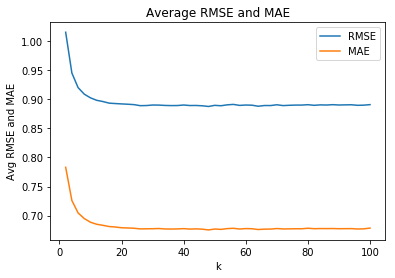

In [9]:
# Print and Plot
data_frame = {'RMSE':rmse,'MAE':mae}
print(pd.DataFrame(data_frame,index=np.arange(2,101,2)))

# plot
plt.plot(np.arange(2,101,2), rmse, label = 'RMSE')
plt.plot(np.arange(2,101,2), mae, label = 'MAE')
plt.title('Average RMSE and MAE')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE and MAE')
plt.show()

### Question 11: Find the minimum k

In [10]:
# find saturation value for slop of such increased first (local min)
min_k = 24

### Question 12: K-NN for popular movie trimming

In [11]:
# NOTE:https://surprise.readthedocs.io/en/stable/getting_started.html#use-cross-validation-iterators
# NOTE:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame
from surprise.model_selection import KFold
from surprise import accuracy
# define a cross-validation iterator
kf = KFold(n_splits=10)
# Algorithm
rmse = []
for k in np.arange(2,101,2):
    rmse_mean = []
    print('now %d out of 100' %k)
    algo = KNNWithMeans(k=k, sim_options={'name': 'pearson'},verbose=False)
    
    for trainset,testset in kf.split(data):
        # train algorithm
        algo.fit(trainset)
        # test algorithm - Popular movie trimming for num_rate >2
        df = pd.DataFrame(testset,columns=['userId','movieId','ratings'])
        testset_trimed = df.groupby('movieId').filter(lambda rate:len(rate)>2)
        predictions = algo.test(np.array(testset_trimed).tolist())
        # Compute and print Root Mean Squared Error
        rmse_mean.append(accuracy.rmse(predictions, verbose=False))
    rmse.append(np.mean(rmse_mean))

now 2 out of 100
now 4 out of 100
now 6 out of 100
now 8 out of 100
now 10 out of 100
now 12 out of 100
now 14 out of 100
now 16 out of 100
now 18 out of 100
now 20 out of 100
now 22 out of 100
now 24 out of 100
now 26 out of 100
now 28 out of 100
now 30 out of 100
now 32 out of 100
now 34 out of 100
now 36 out of 100
now 38 out of 100
now 40 out of 100
now 42 out of 100
now 44 out of 100
now 46 out of 100
now 48 out of 100
now 50 out of 100
now 52 out of 100
now 54 out of 100
now 56 out of 100
now 58 out of 100
now 60 out of 100
now 62 out of 100
now 64 out of 100
now 66 out of 100
now 68 out of 100
now 70 out of 100
now 72 out of 100
now 74 out of 100
now 76 out of 100
now 78 out of 100
now 80 out of 100
now 82 out of 100
now 84 out of 100
now 86 out of 100
now 88 out of 100
now 90 out of 100
now 92 out of 100
now 94 out of 100
now 96 out of 100
now 98 out of 100
now 100 out of 100


Minimum Value of RMSE =  0.8538582776975785


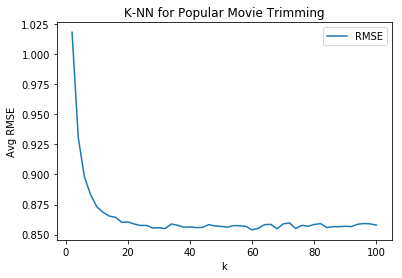

In [12]:
# Print and Plot
print('Minimum Value of RMSE = ', min(rmse))

# plot
plt.plot(np.arange(2,101,2), rmse, label = 'RMSE')
plt.title('K-NN for Popular Movie Trimming')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE')
plt.show()

### Question 13: K-NN for Unpopular movie trimming

In [13]:
# Algorithm
rmse = []
for k in np.arange(2,101,2):
    rmse_mean = []
    print('now %d out of 100' %k)
    algo = KNNWithMeans(k=k, sim_options={'name': 'pearson'},verbose=False)
    
    for trainset,testset in kf.split(data):
        # train algorithm
        algo.fit(trainset)
        # test algorithm - Unpopular movie trimming for num_rate <=2
        df = pd.DataFrame(testset,columns=['userId','movieId','ratings'])
        testset_trimed = df.groupby('movieId').filter(lambda rate:len(rate)<=2)
        predictions = algo.test(np.array(testset_trimed).tolist())
        # Compute and print Root Mean Squared Error
        rmse_mean.append(accuracy.rmse(predictions, verbose=False))
    rmse.append(np.mean(rmse_mean))

now 2 out of 100
now 4 out of 100
now 6 out of 100
now 8 out of 100
now 10 out of 100
now 12 out of 100
now 14 out of 100
now 16 out of 100
now 18 out of 100
now 20 out of 100
now 22 out of 100
now 24 out of 100
now 26 out of 100
now 28 out of 100
now 30 out of 100
now 32 out of 100
now 34 out of 100
now 36 out of 100
now 38 out of 100
now 40 out of 100
now 42 out of 100
now 44 out of 100
now 46 out of 100
now 48 out of 100
now 50 out of 100
now 52 out of 100
now 54 out of 100
now 56 out of 100
now 58 out of 100
now 60 out of 100
now 62 out of 100
now 64 out of 100
now 66 out of 100
now 68 out of 100
now 70 out of 100
now 72 out of 100
now 74 out of 100
now 76 out of 100
now 78 out of 100
now 80 out of 100
now 82 out of 100
now 84 out of 100
now 86 out of 100
now 88 out of 100
now 90 out of 100
now 92 out of 100
now 94 out of 100
now 96 out of 100
now 98 out of 100
now 100 out of 100


Minimum Value of RMSE =  0.9496673837118992


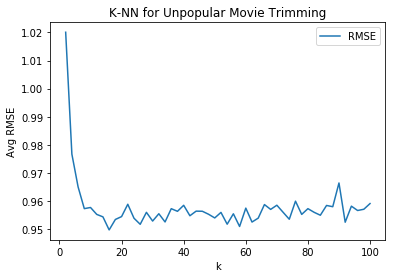

In [14]:
# Print and Plot
print('Minimum Value of RMSE = ', min(rmse))

# plot
plt.plot(np.arange(2,101,2), rmse, label = 'RMSE')
plt.title('K-NN for Unpopular Movie Trimming')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE')
plt.show()

### Question 14: K-NN for high variance movie trimming

In [15]:
# Algorithm
rmse = []
for k in np.arange(2,101,2):
    rmse_mean = []
    print('now %d out of 100' %k)
    algo = KNNWithMeans(k=k, sim_options={'name': 'pearson'},verbose=False)
    
    for trainset,testset in kf.split(data):
        # train algorithm
        algo.fit(trainset)
        # test algorithm - high variance movie trimming for num_rate>=5,var>=2
        df = pd.DataFrame(testset,columns=['userId','movieId','ratings'])
        testset_trimed = df.groupby('movieId').filter(lambda rate:rate.var()>=2)
        testset_trimed = testset_trimed.groupby('movieId').filter(lambda rate:len(rate)>=5)
        predictions = algo.test(np.array(testset_trimed).tolist())
        # Compute and print Root Mean Squared Error
        rmse_mean.append(accuracy.rmse(predictions, verbose=False))
    rmse.append(np.mean(rmse_mean))

now 2 out of 100
now 4 out of 100
now 6 out of 100
now 8 out of 100
now 10 out of 100
now 12 out of 100
now 14 out of 100
now 16 out of 100
now 18 out of 100
now 20 out of 100
now 22 out of 100
now 24 out of 100
now 26 out of 100
now 28 out of 100
now 30 out of 100
now 32 out of 100
now 34 out of 100
now 36 out of 100
now 38 out of 100
now 40 out of 100
now 42 out of 100
now 44 out of 100
now 46 out of 100
now 48 out of 100
now 50 out of 100
now 52 out of 100
now 54 out of 100
now 56 out of 100
now 58 out of 100
now 60 out of 100
now 62 out of 100
now 64 out of 100
now 66 out of 100
now 68 out of 100
now 70 out of 100
now 72 out of 100
now 74 out of 100
now 76 out of 100
now 78 out of 100
now 80 out of 100
now 82 out of 100
now 84 out of 100
now 86 out of 100
now 88 out of 100
now 90 out of 100
now 92 out of 100
now 94 out of 100
now 96 out of 100
now 98 out of 100
now 100 out of 100


Minimum Value of RMSE =  1.3124031183803082


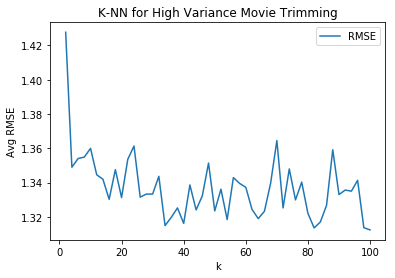

In [16]:
# Print and Plot
print('Minimum Value of RMSE = ', min(rmse))

# plot
plt.plot(np.arange(2,101,2), rmse, label = 'RMSE')
plt.title('K-NN for High Variance Movie Trimming')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE')
plt.show()

### Question 15: Plot ROC

threshold =  2.5 :
Area under curve (AUC) = 0.7829627424683396


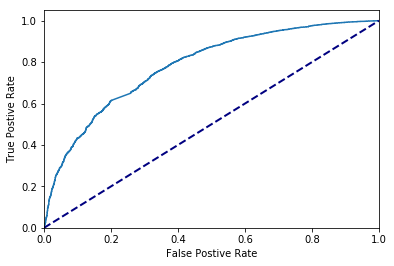

threshold =  3.0 :
Area under curve (AUC) = 0.7785273709039222


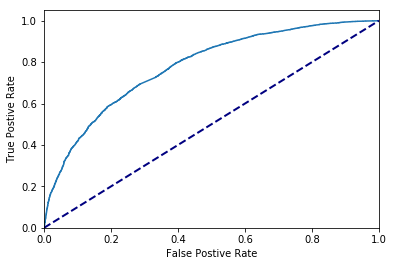

threshold =  3.5 :
Area under curve (AUC) = 0.7668839196079515


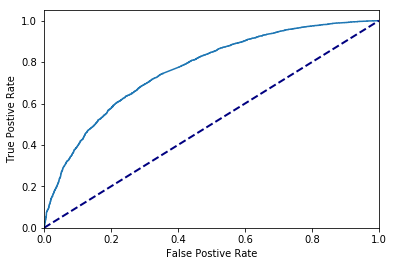

threshold =  4.0 :
Area under curve (AUC) = 0.7763592950922361


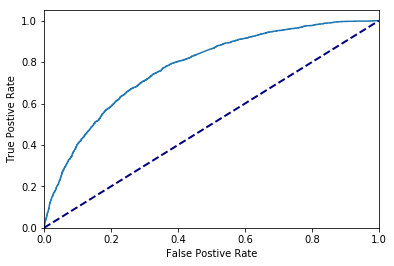

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from surprise.model_selection import train_test_split
#NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#NOTE: https://www.programiz.com/python-programming/methods/built-in/getattr
for threshold in np.arange(2.5,4.5,0.5):
    trainset, testset = train_test_split(data,test_size=0.1)
    algo = KNNWithMeans(k=min_k, sim_options={'name': 'pearson'},verbose=False)
    algo.fit(trainset)
    predictions = algo.test(testset)
    # Plot ROC
    labels = [1 if getattr(label,'r_ui')>threshold else 0 for label in predictions]
    scores = [getattr(scores,'est') for scores in predictions]
    fpr, tpr, thr = roc_curve(labels, scores)
    roc_auc = auc(fpr,tpr)
    print("threshold = ",threshold, ":")
    print("Area under curve (AUC) =", roc_auc)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Postive Rate')
    plt.show()


## 5.2 Non-negative matrix factorization (NNMF) ##

In [18]:
from surprise.prediction_algorithms.matrix_factorization import NMF

### Question 17 Design a NNMF-based collaborative flter ###

In [19]:
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import KNNWithMeans
from surprise.model_selection.validation import cross_validate
# Load Data
reader = Reader(line_format='user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file( 
    "ratings.csv",reader=reader)

rmse_nmf = []
mae_nmf = []
for k in range(2,51,2):
    print('now %d out of 50' %k)
    algo_nmf = NMF(n_factors=k, biased=False)
    CV_nmf = cross_validate(algo_nmf,data,measures=['rmse','mae'],cv=10,verbose=False)
#     print(np.mean(CV_nmf['test_rmse']))
#     print(np.mean(CV_nmf['test_mae']))
    rmse_nmf.append(np.mean(CV_nmf['test_rmse']))
    mae_nmf.append(np.mean(CV_nmf['test_mae']))
    


now 2 out of 50
now 4 out of 50
now 6 out of 50
now 8 out of 50
now 10 out of 50
now 12 out of 50
now 14 out of 50
now 16 out of 50
now 18 out of 50
now 20 out of 50
now 22 out of 50
now 24 out of 50
now 26 out of 50
now 28 out of 50
now 30 out of 50
now 32 out of 50
now 34 out of 50
now 36 out of 50
now 38 out of 50
now 40 out of 50
now 42 out of 50
now 44 out of 50
now 46 out of 50
now 48 out of 50
now 50 out of 50


        RMSE       MAE
2   1.141878  0.960222
4   1.038604  0.849363
6   0.978564  0.783518
8   0.946683  0.746135
10  0.930529  0.725290
12  0.920869  0.712235
14  0.914564  0.702852
16  0.909817  0.695446
18  0.911374  0.694137
20  0.915278  0.694430
22  0.915872  0.693930
24  0.919628  0.694826
26  0.923027  0.697126
28  0.928275  0.700750
30  0.929413  0.700721
32  0.934679  0.704617
34  0.938496  0.706918
36  0.940255  0.708021
38  0.944963  0.711671
40  0.950363  0.716102
42  0.952961  0.717583
44  0.954651  0.718920
46  0.959881  0.722084
48  0.961352  0.723796
50  0.968010  0.729626


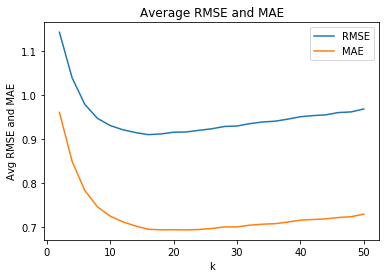

In [20]:
# Print and Plot
data_frame = {'RMSE':rmse_nmf,'MAE':mae_nmf}
print(pd.DataFrame(data_frame,index=np.arange(2,51,2)))

# plot
plt.plot(np.arange(2,51,2), rmse_nmf, label = 'RMSE')
plt.plot(np.arange(2,51,2), mae_nmf, label = 'MAE')
plt.title('Average RMSE and MAE')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE and MAE')
plt.show()

### Question 18: Find the minimum k ###

In [78]:
# find saturation value for slop of such increased first (local min)
nmf_min_k = (np.argmin(rmse_nmf)+1)*2

### Question 19: NNMF for popular movie trimming ####

In [22]:
# NOTE:https://surprise.readthedocs.io/en/stable/getting_started.html#use-cross-validation-iterators
# NOTE:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame
from surprise.model_selection import KFold
from surprise import accuracy
# define a cross-validation iterator
kf = KFold(n_splits=10)
# Algorithm
rmse = []
for k in np.arange(2,51,2):
    rmse_mean = []
    print('now %d out of 50' %k)
    algo_nmf = NMF(n_factors=k, biased=False)
    for trainset,testset in kf.split(data):
        # train algorithm
        algo_nmf.fit(trainset)
        # test algorithm - Popular movie trimming for num_rate >2
        df = pd.DataFrame(testset,columns=['userId','movieId','ratings'])
        testset_trimed = df.groupby('movieId').filter(lambda rate:len(rate)>2)
        predictions = algo_nmf.test(np.array(testset_trimed).tolist())
        # Compute and print Root Mean Squared Error
        rmse_mean.append(accuracy.rmse(predictions, verbose=False))
    rmse.append(np.mean(rmse_mean))

now 2 out of 50
now 4 out of 50
now 6 out of 50
now 8 out of 50
now 10 out of 50
now 12 out of 50
now 14 out of 50
now 16 out of 50
now 18 out of 50
now 20 out of 50
now 22 out of 50
now 24 out of 50
now 26 out of 50
now 28 out of 50
now 30 out of 50
now 32 out of 50
now 34 out of 50
now 36 out of 50
now 38 out of 50
now 40 out of 50
now 42 out of 50
now 44 out of 50
now 46 out of 50
now 48 out of 50
now 50 out of 50


Minimum Value of RMSE =  0.8723054024342283


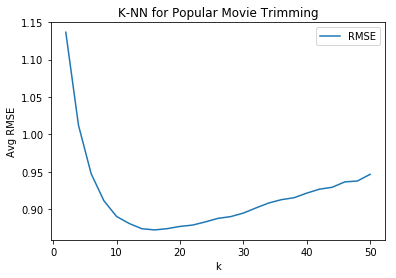

In [23]:
# Print and Plot
print('Minimum Value of RMSE = ', min(rmse))

# plot
plt.plot(np.arange(2,51,2), rmse, label = 'RMSE')
plt.title('K-NN for Popular Movie Trimming')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE')
plt.show()

### Question 20: NNMF for unpopular movie trimming ####

In [24]:
# Algorithm
rmse = []
for k in np.arange(2,51,2):
    rmse_mean = []
    print('now %d out of 50' %k)
    algo_nmf = NMF(n_factors=k, biased=False)
    
    for trainset,testset in kf.split(data):
        # train algorithm
        algo_nmf.fit(trainset)
        # test algorithm - Unpopular movie trimming for num_rate <=2
        df = pd.DataFrame(testset,columns=['userId','movieId','ratings'])
        testset_trimed = df.groupby('movieId').filter(lambda rate:len(rate)<=2)
        predictions = algo_nmf.test(np.array(testset_trimed).tolist())
        # Compute and print Root Mean Squared Error
        rmse_mean.append(accuracy.rmse(predictions, verbose=False))
    rmse.append(np.mean(rmse_mean))

now 2 out of 50
now 4 out of 50
now 6 out of 50
now 8 out of 50
now 10 out of 50
now 12 out of 50
now 14 out of 50
now 16 out of 50
now 18 out of 50
now 20 out of 50
now 22 out of 50
now 24 out of 50
now 26 out of 50
now 28 out of 50
now 30 out of 50
now 32 out of 50
now 34 out of 50
now 36 out of 50
now 38 out of 50
now 40 out of 50
now 42 out of 50
now 44 out of 50
now 46 out of 50
now 48 out of 50
now 50 out of 50


Minimum Value of RMSE =  0.9896324416906317


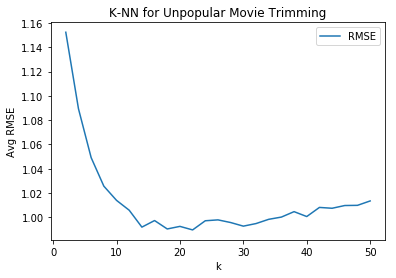

In [25]:
# Print and Plot
print('Minimum Value of RMSE = ', min(rmse))

# plot
plt.plot(np.arange(2,51,2), rmse, label = 'RMSE')
plt.title('K-NN for Unpopular Movie Trimming')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE')
plt.show()

### Question 21: NNMF for high variance movie trimming

In [26]:
# Algorithm
rmse = []
for k in np.arange(2,51,2):
    rmse_mean = []
    print('now %d out of 50' %k)
    algo_nmf = NMF(n_factors=k, biased=False)
    
    for trainset,testset in kf.split(data):
        # train algorithm
        algo_nmf.fit(trainset)
        # test algorithm - high variance movie trimming for num_rate>=5,var>=2
        df = pd.DataFrame(testset,columns=['userId','movieId','ratings'])
        testset_trimed = df.groupby('movieId').filter(lambda rate:rate.var()>=2)
        testset_trimed = testset_trimed.groupby('movieId').filter(lambda rate:len(rate)>=5)
        predictions = algo_nmf.test(np.array(testset_trimed).tolist())
        # Compute and print Root Mean Squared Error
        rmse_mean.append(accuracy.rmse(predictions, verbose=False))
    rmse.append(np.mean(rmse_mean))

now 2 out of 50
now 4 out of 50
now 6 out of 50
now 8 out of 50
now 10 out of 50
now 12 out of 50
now 14 out of 50
now 16 out of 50
now 18 out of 50
now 20 out of 50
now 22 out of 50
now 24 out of 50
now 26 out of 50
now 28 out of 50
now 30 out of 50
now 32 out of 50
now 34 out of 50
now 36 out of 50
now 38 out of 50
now 40 out of 50
now 42 out of 50
now 44 out of 50
now 46 out of 50
now 48 out of 50
now 50 out of 50


Minimum Value of RMSE =  1.321321822555875


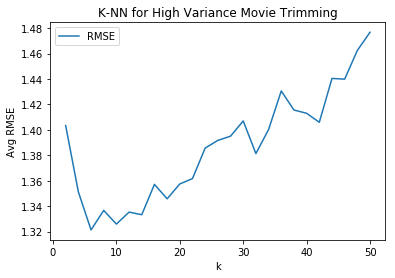

In [27]:
# Print and Plot
print('Minimum Value of RMSE = ', min(rmse))

# plot
plt.plot(np.arange(2,51,2), rmse, label = 'RMSE')
plt.title('K-NN for High Variance Movie Trimming')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE')
plt.show()

### Question 22: Plot ROC ###

threshold =  2.5 :
Area under curve (AUC) = 0.7736290315548897


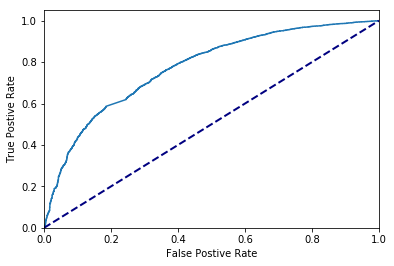

threshold =  3.0 :
Area under curve (AUC) = 0.762530768993676


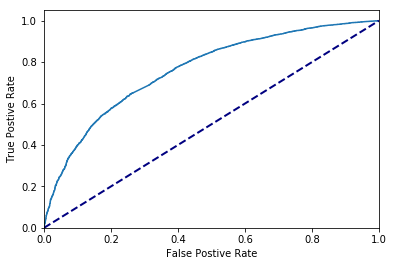

threshold =  3.5 :
Area under curve (AUC) = 0.7567727562197805


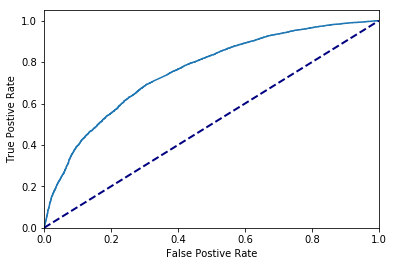

threshold =  4.0 :
Area under curve (AUC) = 0.763876752410933


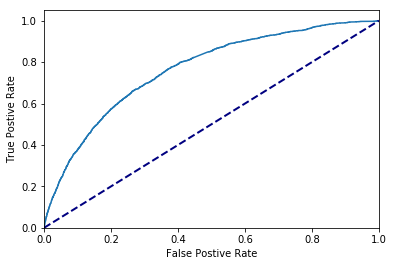

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from surprise.model_selection import train_test_split
#NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#NOTE: https://www.programiz.com/python-programming/methods/built-in/getattr
for threshold in np.arange(2.5,4.5,0.5):
    trainset, testset = train_test_split(data,test_size=0.1)
    algo_nmf = NMF(n_factors=nmf_min_k, biased=False)
    algo_nmf.fit(trainset)
    predictions = algo_nmf.test(testset)
    # Plot ROC
    labels = [1 if getattr(label,'r_ui')>threshold else 0 for label in predictions]
    scores = [getattr(scores,'est') for scores in predictions]
    fpr, tpr, thr = roc_curve(labels, scores)
    roc_auc = auc(fpr,tpr)
    print("threshold = ",threshold, ":")
    print("Area under curve (AUC) =", roc_auc)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Postive Rate')
    plt.show()


### Question 23: Interpretability of NNMF ###

In [29]:
import sklearn.decomposition as sk
ratings = pd.read_csv("C:\\Users\\xmliu\\Documents\\ECE219\\project3\\ml-latest-small\\ratings.csv")
rating_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)

NMF_q23 = sk.NMF(n_components=20, init = 'random', random_state=42)
NMF_q23.fit_transform(rating_matrix)
V = (NMF_q23.components_).T

In [30]:
moviesIDs = np.array(rating_matrix.columns.values)
movies = pd.read_csv("C:\\Users\\xmliu\\Documents\\ECE219\\project3\\ml-latest-small\\movies.csv",index_col=0)
for k in range(20):
    print("K = ", (k+1))
    V_cnt_up = np.argsort(V[:,k])
    V_cnt_dwn = np.flip(V_cnt_up)
    top_10 = moviesIDs[V_cnt_dwn[:10]]
    genres = []
    for IDnum in top_10:
        genres.append(movies.loc[IDnum,'genres'])
    print(pd.DataFrame(genres, columns=['genres']))

K =  1
                             genres
0                  Action|Drama|War
1         Adventure|Fantasy|Musical
2  Action|Adventure|Sci-Fi|Thriller
3                      Comedy|Drama
4             Crime|Drama|Film-Noir
5              Comedy|Drama|Romance
6                    Comedy|Romance
7                  Action|Adventure
8                     Drama|Western
9                             Drama
K =  2
                                     genres
0                            Comedy|Romance
1                  Comedy|Drama|Romance|War
2                              Comedy|Crime
3                                     Drama
4                             Drama|Romance
5  Action|Adventure|Animation|Drama|Fantasy
6  Adventure|Animation|Drama|Fantasy|Sci-Fi
7                    Action|Sci-Fi|Thriller
8                                     Drama
9              Comedy|Drama|Musical|Romance
K =  3
                                    genres
0                             Comedy|Drama
1            

## 5.3 Matrix factorization with bias (MF with bias) ##

In [31]:
from surprise.prediction_algorithms.matrix_factorization import SVD

### Question 24: Design a MF with bias collaborative flter ###

In [32]:
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import KNNWithMeans
from surprise.model_selection.validation import cross_validate
# Load Data
reader = Reader(line_format='user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file( 
    "ratings.csv",reader=reader)

rmse_svd = []
mae_svd = []
for k in range(2,51,2):
    print('now %d out of 50' %k)
    algo_svd = SVD(n_factors=k, biased=True)
    algo_svd = cross_validate(algo_svd,data,measures=['rmse','mae'],cv=10,verbose=False)
#     print(np.mean(CV_svd['test_rmse']))
#     print(np.mean(CV_svd['test_mae']))
    rmse_svd.append(np.mean(algo_svd['test_rmse']))
    mae_svd.append(np.mean(algo_svd['test_mae']))

now 2 out of 50
now 4 out of 50
now 6 out of 50
now 8 out of 50
now 10 out of 50
now 12 out of 50
now 14 out of 50
now 16 out of 50
now 18 out of 50
now 20 out of 50
now 22 out of 50
now 24 out of 50
now 26 out of 50
now 28 out of 50
now 30 out of 50
now 32 out of 50
now 34 out of 50
now 36 out of 50
now 38 out of 50
now 40 out of 50
now 42 out of 50
now 44 out of 50
now 46 out of 50
now 48 out of 50
now 50 out of 50


        RMSE       MAE
2   0.866515  0.665678
4   0.866918  0.666303
6   0.866815  0.666268
8   0.866941  0.665643
10  0.866725  0.665669
12  0.866884  0.665696
14  0.865694  0.665170
16  0.866292  0.664974
18  0.866107  0.665360
20  0.865561  0.665207
22  0.866103  0.665320
24  0.866345  0.664998
26  0.865812  0.664733
28  0.864876  0.663741
30  0.865953  0.665495
32  0.866182  0.665456
34  0.865673  0.665602
36  0.865711  0.665123
38  0.865738  0.664487
40  0.865237  0.664042
42  0.867019  0.665426
44  0.865421  0.664183
46  0.866983  0.665576
48  0.866070  0.664958
50  0.865794  0.664874


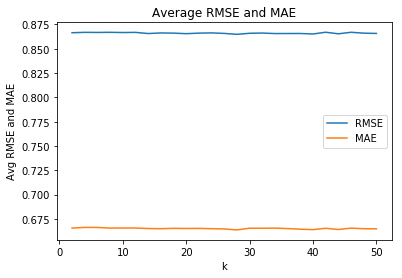

In [33]:
# Print and Plot
data_frame = {'RMSE':rmse_svd,'MAE':mae_svd}
print(pd.DataFrame(data_frame,index=np.arange(2,51,2)))

# change name
# plot
plt.plot(np.arange(2,51,2), rmse_svd, label = 'RMSE')
plt.plot(np.arange(2,51,2), mae_svd, label = 'MAE')
plt.title('Average RMSE and MAE')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE and MAE')
plt.show()

### Question 25: Find the minimum k ###

In [77]:
# find saturation value for slop of such increased first (local min)
svd_min_k = (np.argmin(rmse_svd)+1)*2

### Question 26: SVD for popular movie trimming ####

In [35]:
# NOTE:https://surprise.readthedocs.io/en/stable/getting_started.html#use-cross-validation-iterators
# NOTE:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame
from surprise.model_selection import KFold
from surprise import accuracy
# define a cross-validation iterator
kf = KFold(n_splits=10)
# Algorithm
rmse = []
for k in np.arange(2,51,2):
    rmse_mean = []
    print('now %d out of 50' %k)
    algo_svd = SVD(n_factors=k, biased=True)
    for trainset,testset in kf.split(data):
        # train algorithm
        algo_svd.fit(trainset)
        # test algorithm - Popular movie trimming for num_rate >2
        df = pd.DataFrame(testset,columns=['userId','movieId','ratings'])
        testset_trimed = df.groupby('movieId').filter(lambda rate:len(rate)>2)
        predictions = algo_svd.test(np.array(testset_trimed).tolist())
        # Compute and print Root Mean Squared Error
        rmse_mean.append(accuracy.rmse(predictions, verbose=False))
    rmse.append(np.mean(rmse_mean))

now 2 out of 50
now 4 out of 50
now 6 out of 50
now 8 out of 50
now 10 out of 50
now 12 out of 50
now 14 out of 50
now 16 out of 50
now 18 out of 50
now 20 out of 50
now 22 out of 50
now 24 out of 50
now 26 out of 50
now 28 out of 50
now 30 out of 50
now 32 out of 50
now 34 out of 50
now 36 out of 50
now 38 out of 50
now 40 out of 50
now 42 out of 50
now 44 out of 50
now 46 out of 50
now 48 out of 50
now 50 out of 50


Minimum Value of RMSE =  0.8460521129706328


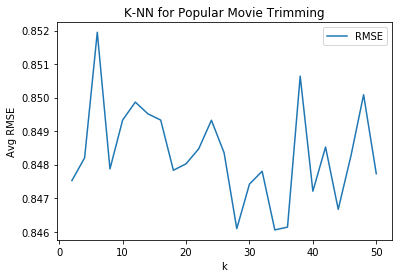

In [36]:
# Print and Plot
print('Minimum Value of RMSE = ', min(rmse))

# plot
plt.plot(np.arange(2,51,2), rmse, label = 'RMSE')
plt.title('K-NN for Popular Movie Trimming')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE')
plt.show()

### Question 27: SVD for unpopular movie trimming ####

In [37]:
# Algorithm
rmse = []
for k in np.arange(2,51,2):
    rmse_mean = []
    print('now %d out of 50' %k)
    algo_svd = SVD(n_factors=k, biased=True)
    
    for trainset,testset in kf.split(data):
        # train algorithm
        algo_svd.fit(trainset)
        # test algorithm - Unpopular movie trimming for num_rate <=2
        df = pd.DataFrame(testset,columns=['userId','movieId','ratings'])
        testset_trimed = df.groupby('movieId').filter(lambda rate:len(rate)<=2)
        predictions = algo_svd.test(np.array(testset_trimed).tolist())
        # Compute and print Root Mean Squared Error
        rmse_mean.append(accuracy.rmse(predictions, verbose=False))
    rmse.append(np.mean(rmse_mean))

now 2 out of 50
now 4 out of 50
now 6 out of 50
now 8 out of 50
now 10 out of 50
now 12 out of 50
now 14 out of 50
now 16 out of 50
now 18 out of 50
now 20 out of 50
now 22 out of 50
now 24 out of 50
now 26 out of 50
now 28 out of 50
now 30 out of 50
now 32 out of 50
now 34 out of 50
now 36 out of 50
now 38 out of 50
now 40 out of 50
now 42 out of 50
now 44 out of 50
now 46 out of 50
now 48 out of 50
now 50 out of 50


Minimum Value of RMSE =  0.899414463745026


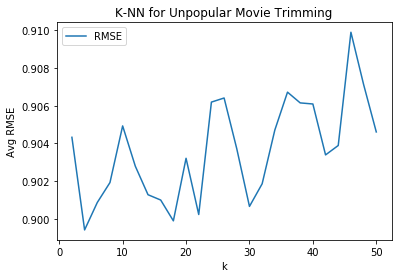

In [38]:
# Print and Plot
print('Minimum Value of RMSE = ', min(rmse))

# plot
plt.plot(np.arange(2,51,2), rmse, label = 'RMSE')
plt.title('K-NN for Unpopular Movie Trimming')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE')
plt.show()

### Question 28: SVD for high variance movie trimming

In [39]:
# Algorithm
rmse = []
for k in np.arange(2,51,2):
    rmse_mean = []
    print('now %d out of 50' %k)
    algo_svd = SVD(n_factors=k, biased=True)
    
    for trainset,testset in kf.split(data):
        # train algorithm
        algo_svd.fit(trainset)
        # test algorithm - high variance movie trimming for num_rate>=5,var>=2
        df = pd.DataFrame(testset,columns=['userId','movieId','ratings'])
        testset_trimed = df.groupby('movieId').filter(lambda rate:rate.var()>=2)
        testset_trimed = testset_trimed.groupby('movieId').filter(lambda rate:len(rate)>=5)
        predictions = algo_svd.test(np.array(testset_trimed).tolist())
        # Compute and print Root Mean Squared Error
        rmse_mean.append(accuracy.rmse(predictions, verbose=False))
    rmse.append(np.mean(rmse_mean))

now 2 out of 50
now 4 out of 50
now 6 out of 50
now 8 out of 50
now 10 out of 50
now 12 out of 50
now 14 out of 50
now 16 out of 50
now 18 out of 50
now 20 out of 50
now 22 out of 50
now 24 out of 50
now 26 out of 50
now 28 out of 50
now 30 out of 50
now 32 out of 50
now 34 out of 50
now 36 out of 50
now 38 out of 50
now 40 out of 50
now 42 out of 50
now 44 out of 50
now 46 out of 50
now 48 out of 50
now 50 out of 50


Minimum Value of RMSE =  1.2983879039093973


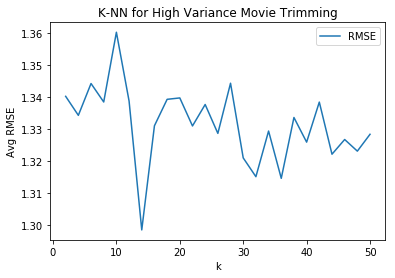

In [40]:
# Print and Plot
print('Minimum Value of RMSE = ', min(rmse))

# plot
plt.plot(np.arange(2,51,2), rmse, label = 'RMSE')
plt.title('K-NN for High Variance Movie Trimming')
plt.legend(loc = 'best')
plt.xlabel('k')
plt.ylabel('Avg RMSE')
plt.show()

### Question 29: Plot ROC

threshold =  2.5 :
Area under curve (AUC) = 0.7937396986399339


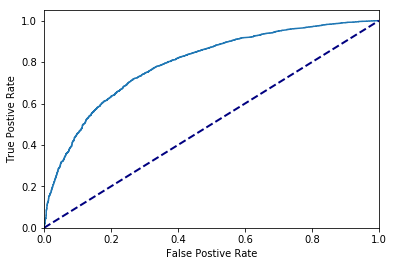

threshold =  3.0 :
Area under curve (AUC) = 0.7898425185516333


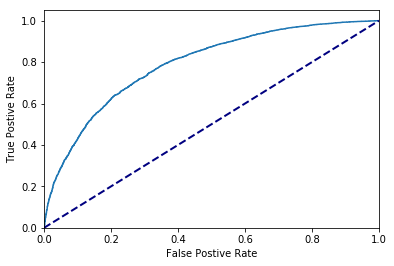

threshold =  3.5 :
Area under curve (AUC) = 0.7855574650852931


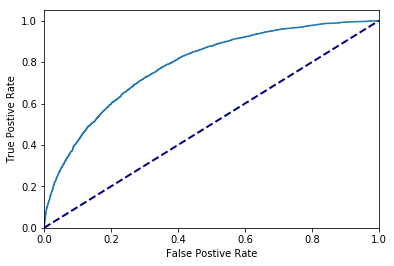

threshold =  4.0 :
Area under curve (AUC) = 0.7776632206356583


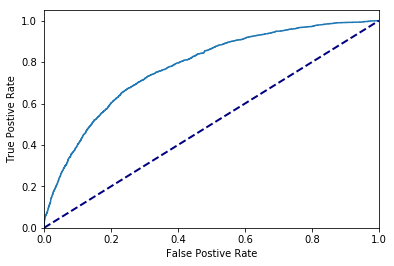

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from surprise.model_selection import train_test_split
#NOTE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
#NOTE: https://www.programiz.com/python-programming/methods/built-in/getattr
for threshold in np.arange(2.5,4.5,0.5):
    trainset, testset = train_test_split(data,test_size=0.1)
    algo_svd = SVD(n_factors=svd_min_k, biased=True)
    algo_svd.fit(trainset)
    predictions = algo_svd.test(testset)
    # Plot ROC
    labels = [1 if getattr(label,'r_ui')>threshold else 0 for label in predictions]
    scores = [getattr(scores,'est') for scores in predictions]
    fpr, tpr, thr = roc_curve(labels, scores)
    roc_auc = auc(fpr,tpr)
    print("threshold = ",threshold, ":")
    print("Area under curve (AUC) =", roc_auc)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Postive Rate')
    plt.show()


# Part 6. Naive collaborative fltering #

### Question 30. Design and test via cross-validation ###

In [42]:
ratings = pd.read_csv("ratings.csv")
rating_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').values
y_mean = np.nanmean(rating_matrix,axis=1)
X_userid = ratings.as_matrix()[:,0]
y_pred = pd.DataFrame({'userId':np.unique(X_userid),'rating':y_mean})
y_pred1 = pd.DataFrame({"userId":X_userid}).join(y_pred.set_index('userId'), how="left", on="userId")['rating'].tolist()
y = ratings.as_matrix()[:,2]
err_naive = y - y_pred1
rmsescore = np.sqrt(np.mean(np.square(err_naive)))
print("RMSE = ", rmsescore)

RMSE =  0.934721133650792


C:\Users\xmliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\xmliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


### 6.3 Naive collaborative flter performance on trimmed testset ###

### Question 31. Naive collaborative fltering for popular movie trimming ###

In [43]:
ratings = pd.read_csv("ratings.csv")
df = pd.DataFrame(ratings,columns=['userId','movieId','rating'])
testset_trimed = df.groupby('movieId').filter(lambda rate:len(rate)>2)

rating_matrix = testset_trimed.pivot(index='userId', columns='movieId', values='rating').values
y_mean = np.nanmean(rating_matrix,axis=1)
X_userid = testset_trimed.as_matrix()[:,0]
y_pred = pd.DataFrame({'userId':np.unique(X_userid),'rating':y_mean})
y_pred1 = pd.DataFrame({"userId":X_userid}).join(y_pred.set_index('userId'), how="left", on="userId")['rating'].tolist()
y = testset_trimed.as_matrix()[:,2]
err_naive = y - y_pred1
rmsescore = np.sqrt(np.mean(np.square(err_naive)))
print("RMSE = ", rmsescore)

RMSE =  0.9307843516009955


C:\Users\xmliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\xmliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


### Question 32. Naive collaborative fltering for unpopular movie trimming ###

In [44]:
ratings = pd.read_csv("ratings.csv")
df = pd.DataFrame(ratings,columns=['userId','movieId','rating'])
testset_trimed = df.groupby('movieId').filter(lambda rate:len(rate)<=2)
rating_matrix = testset_trimed.pivot(index='userId', columns='movieId', values='rating').values
y_mean = np.nanmean(rating_matrix,axis=1)


X_userid = testset_trimed.as_matrix()[:,0]
y_pred = pd.DataFrame({'userId':np.unique(X_userid),'rating':y_mean})
y_pred1 = pd.DataFrame({"userId":X_userid}).join(y_pred.set_index('userId'), how="left", on="userId")['rating'].tolist()
y = testset_trimed.as_matrix()[:,2]
err_naive = y - y_pred1
rmsescore = np.sqrt(np.mean(np.square(err_naive)))
print("RMSE = ", rmsescore)

RMSE =  0.8412537326028978


C:\Users\xmliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\xmliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


### Question 33. Naive collaborative fltering for high variance movie trimming ###

In [45]:
ratings = pd.read_csv("ratings.csv")
df = pd.DataFrame(ratings,columns=['userId','movieId','rating'])
testset_trimed = df.groupby('movieId').filter(lambda rate:rate['rating'].var()>=2)
testset_trimed = testset_trimed.groupby('movieId').filter(lambda rate:len(rate)>=5)

rating_matrix = testset_trimed.pivot(index='userId', columns='movieId', values='rating').values
y_mean = np.nanmean(rating_matrix,axis=1)

X_userid = testset_trimed.as_matrix()[:,0]
y_pred = pd.DataFrame({'userId':np.unique(X_userid),'rating':y_mean})
y_pred1 = pd.DataFrame({"userId":X_userid}).join(y_pred.set_index('userId'), how="left", on="userId")['rating'].tolist()
y = testset_trimed.as_matrix()[:,2]
err_naive = y - y_pred1
rmsescore = np.sqrt(np.mean(np.square(err_naive)))
print("RMSE = ", rmsescore)

RMSE =  0.923598592555012


C:\Users\xmliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
C:\Users\xmliu\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


# Part 7 Performance comparison #

### Question 34. Plot the ROC curves for k-NN, NNMF, and MF

In [46]:
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import KNNWithMeans
from surprise.model_selection.validation import cross_validate
# Load Data
# Load Data
reader = Reader(line_format='user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file( 
    "ratings.csv",reader=reader)

### KNN ###

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from surprise.model_selection import train_test_split
threshold = 3
trainset, testset = train_test_split(data,test_size=0.1)
algo = KNNWithMeans(k=min_k, sim_options={'name': 'pearson'},verbose=False)
algo.fit(trainset)
predictions = algo.test(testset)
# Plot ROC
labels = [1 if getattr(label,'r_ui')>threshold else 0 for label in predictions]
scores = [getattr(scores,'est') for scores in predictions]
fpr_knn, tpr_knn, thr_knn = roc_curve(labels, scores)
roc_auc_knn = auc(fpr_knn,tpr_knn)
print("threshold = ",threshold, ":")
print("Area under curve (AUC) =", roc_auc_knn)

threshold =  3 :
Area under curve (AUC) = 0.7827461537015037


### NNMF ###

In [62]:
from surprise.prediction_algorithms.matrix_factorization import NMF
trainset, testset = train_test_split(data,test_size=0.1)
algo_nmf = NMF(n_factors=nmf_min_k, biased=False)
algo_nmf.fit(trainset)
predictions = algo_nmf.test(testset)
# Plot ROC
labels = [1 if getattr(label,'r_ui')>threshold else 0 for label in predictions]
scores = [getattr(scores,'est') for scores in predictions]
fpr_nnmf, tpr_nnmf, thr_nnmf = roc_curve(labels, scores)
roc_auc_nnmf = auc(fpr_nnmf,tpr_nnmf)
print("threshold = ",threshold, ":")
print("Area under curve (AUC) =", roc_auc_nnmf)

threshold =  3 :
Area under curve (AUC) = 0.7617045912883933


### MF ###

In [63]:
from surprise.prediction_algorithms.matrix_factorization import SVD
trainset, testset = train_test_split(data,test_size=0.1)
algo_svd = SVD(n_factors=svd_min_k, biased=True)
algo_svd.fit(trainset)
predictions = algo_svd.test(testset)
# Plot ROC
labels = [1 if getattr(label,'r_ui')>threshold else 0 for label in predictions]
scores = [getattr(scores,'est') for scores in predictions]
fpr_mf, tpr_mf, thr_mf = roc_curve(labels, scores)
roc_auc_mf = auc(fpr_mf,tpr_mf)
print("threshold = ",threshold, ":")
print("Area under curve (AUC) =", roc_auc_mf)

threshold =  3 :
Area under curve (AUC) = 0.7830589374481929


k-NN rate_auc = 0.7827461537015037
NNMF rate_auc = 0.7617045912883933
MF with bias rate_auc = 0.7830589374481929


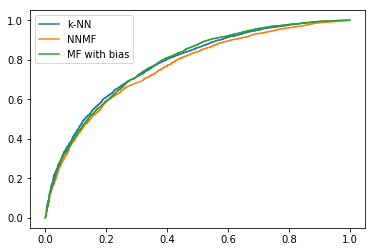

In [64]:
plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_nnmf, tpr_nnmf)
plt.plot(fpr_mf, tpr_mf)
print("k-NN rate_auc =", roc_auc_knn)
print("NNMF rate_auc =", roc_auc_nnmf)
print("MF with bias rate_auc =", roc_auc_mf)
plt.legend(['k-NN','NNMF','MF with bias'])
plt.show()

# Part 8 Ranking #

In [69]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from surprise.prediction_algorithms import NMF
from surprise.prediction_algorithms import SVD
from surprise.model_selection import KFold
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans


#k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")
#rate_mat = ratings.pivot(index='userId', columns='movieId', values='rating').as_matrix()
reader = Reader(rating_scale=(1,5))
scores = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader = reader)

In [52]:
def obtain_pre_rec(data_set,frame_pd,t):
    pre_1 = []
    rec_1 = []
    for single in data_set:
        piece_pd = frame_pd[frame_pd[0] == single]
        threshold = len(piece_pd[2][piece_pd[2] > 2])
        ground_truth = np.array(piece_pd[1][piece_pd[2] > 2])
        if t <= threshold:
            piece_pd.sort_values(by=[3],axis=0, ascending=False, inplace = False )
            sorted_piece = piece_pd.sort_values(by=[3], ascending=False )
            sorted_piece = sorted_piece[1][0:t]
            recom_list = np.array(sorted_piece)
            set_of_items = len(np.intersect1d(ground_truth, recom_list))
            recall = float(set_of_items) / len(ground_truth)
            precision = float(set_of_items) / t
            rec_1.append(recall)
            pre_1.append(precision)
    return pre_1,rec_1

#Obtain the precision and recall
def gen_pre_rec(pred_pref):
    pre_total=[]
    rec_total=[]
    frame_pd = pd.DataFrame(np.array(pred_pref))
    data_set = np.unique(frame_pd[0])
    
    for t in range(1,26):
        pre,rec=obtain_pre_rec(data_set,frame_pd,t)
        rec_total.append(np.mean(rec))
        pre_total.append(np.mean(pre)) 
    return pre_total,rec_total

In [53]:
#obtain average precision and recall and plot them out
def plot_final_graph(k_fold,algo):
    precision_long = np.zeros((1,25))
    recall_long = np.zeros((1,25))
    
    for trainset, testset in k_fold.split(scores):
        algo.fit(trainset)
        predict = algo.test(testset)
        pre, rec = gen_pre_rec(predict)
        recall_long = recall_long + rec
        precision_long = precision_long + pre

    print (len(precision_long))
    print (len(recall_long))

    ave_pre = precision_long / 10
    ave_rec = recall_long / 10
    print (ave_pre)
    print (ave_rec)

    length=len(ave_pre[0]) + 1
    x = range(1,length)

    plt.plot(ave_rec[0], ave_pre[0])
    plt.xlabel("avg recall")
    plt.ylabel("avg precision")
    plt.show()
    
    x = range(1,length)
    plt.plot(x,ave_pre[0])
    plt.xlabel("t")
    plt.ylabel("average precision")
    plt.show()
    
    x = range(1,length)
    plt.plot(x,ave_rec[0])
    plt.xlabel("t")
    plt.ylabel("average recall")
    plt.show()
    
    return ave_pre, ave_rec

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
1
1
[[0.94742287 0.94817182 0.94824053 0.94794719 0.94663772 0.94626355
  0.94581222 0.94588595 0.94559803 0.94528533 0.94684701 0.94600361
  0.94588789 0.94577698 0.94440573 0.94309253 0.9418546  0.94164951
  0.94084904 0.9415691

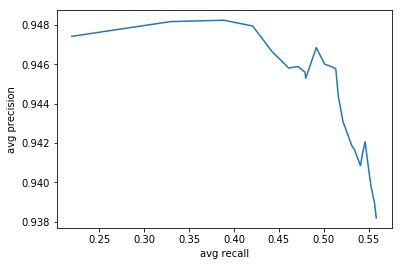

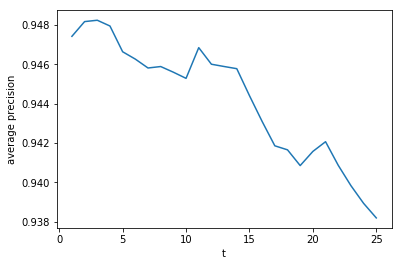

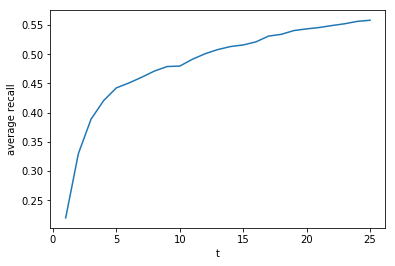

In [70]:
#36
#used optimal k found in 11
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
algo = KNNWithMeans(k=min_k, sim_options={'name': 'pearson'})

avg_pre1,avg_rec1 = plot_final_graph(k_fold,algo)

1
1
[[0.94219616 0.94395871 0.942938   0.94069814 0.9415773  0.94235929
  0.9411326  0.94077496 0.94159357 0.94131574 0.94244856 0.94173694
  0.94213342 0.94143155 0.94027764 0.93961857 0.9389026  0.93931716
  0.93935703 0.94038357 0.94064905 0.94006072 0.93904378 0.93863495
  0.93785839]]
[[0.21829735 0.32822006 0.38644531 0.41688877 0.4394417  0.44867059
  0.45746223 0.46825768 0.47647926 0.47704474 0.48822703 0.49769348
  0.50512173 0.50997612 0.51249998 0.51797604 0.5280488  0.53119701
  0.53821122 0.54135094 0.54342531 0.54709211 0.55017404 0.55466336
  0.55636459]]


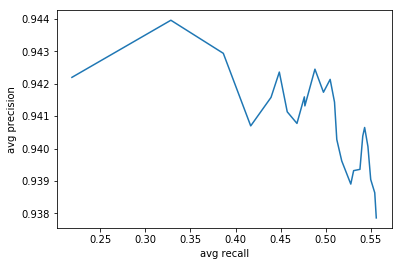

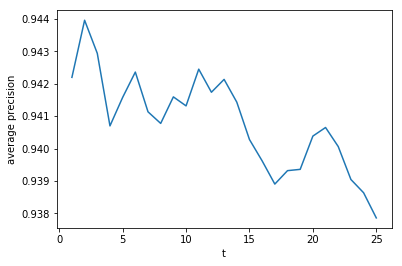

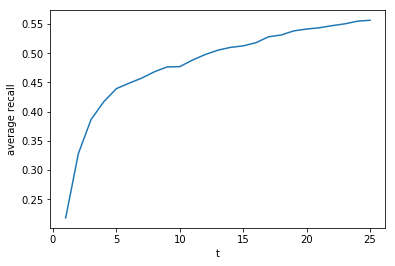

In [72]:
#37
#used optimal k found in 18
algo = NMF(n_factors=nmf_min_k, biased=False,random_state=42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_pre2, avg_rec2 = plot_final_graph(k_fold,algo)

1
1
[[0.94796373 0.95276846 0.95202902 0.94981257 0.94766053 0.94823098
  0.94771341 0.94744032 0.94807217 0.94754849 0.94964643 0.94903128
  0.94938054 0.94867667 0.94753072 0.94641936 0.94596197 0.94610898
  0.9459306  0.94706641 0.94759121 0.9470145  0.94639868 0.9460617
  0.94633915]]
[[0.21819362 0.32989909 0.38909134 0.41991638 0.44135783 0.4502617
  0.45981564 0.47042366 0.47890523 0.47927992 0.49114433 0.50063374
  0.50791907 0.51242432 0.51503091 0.5204132  0.53085033 0.53373775
  0.54055474 0.54360063 0.54576642 0.54926685 0.55262924 0.55721417
  0.55940836]]


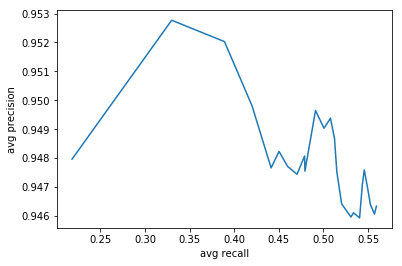

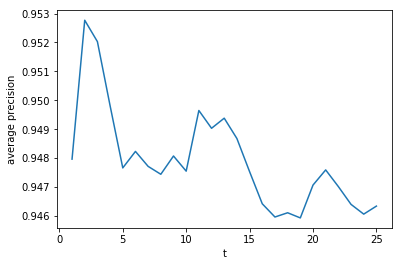

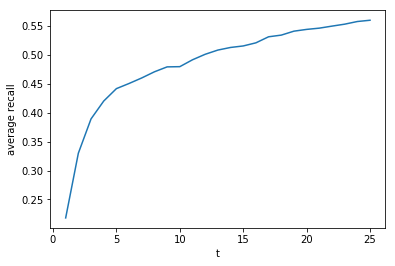

In [73]:
#38
#used optimal k found in 25
algo = SVD(n_factors=svd_min_k, random_state=42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_pre3,avg_rec3  = plot_final_graph(k_fold,algo)

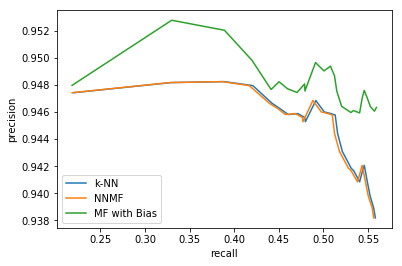

In [74]:
#39
#Plot contents from 36 to 38 together
plt.plot( avg_rec1[0], avg_pre1[0],label = "k-NN")
plt.plot( avg_rec2[0], avg_pre1[0], label = "NNMF")
plt.plot( avg_rec3[0], avg_pre3[0], label = "MF with Bias")

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend()
plt.show()